In [1]:
import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import DataFrame, Series

import scipy
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
data = DataFrame({
    'Name':[chr(i) for i in range(65, 120)],
    'Age': np.random.randint(15,35,55),
    'Height': np.random.randint(155,200,55),
    'Gender': [['Male', 'Female'][np.random.randint(2)] for i in range(55)],
    'Team': [['Red', 'Blue', 'Black', 'Yellow', 'Green'][np.random.randint(5)] for i in range(55)],
    'Score': np.random.randint(50,100,55)
})

data['Experience'] = data['Age'] - 15 + np.random.randint(0,5,55)

data.head()

,Name,Age,Height,Gender,Team,Score,Experience
0,A,21,182,Female,Green,87,6
1,B,32,173,Male,Red,64,21
2,C,29,173,Female,Blue,76,17
3,D,34,163,Male,Green,53,22
4,E,18,160,Female,Blue,64,3


## Basic Nmupy Operations

In [10]:
np.set_printoptions(precision=2) #2 decimal places

In [6]:
print(f'{rand():.2f}')

0.57


In [ ]:
randn(50)

array([-0.44, -0.24, -0.02, -0.57,  1.98,  0.13, -0.55,  0.05, -1.75,
        0.07,  0.17,  1.11,  0.31, -1.61, -1.85,  1.37,  0.58, -0.28,
        1.06, -0.38,  0.89,  1.49, -1.69, -0.45,  0.01,  2.07, -0.14,
        0.23, -0.28, -0.46, -0.6 , -1.73,  1.7 ,  0.31, -0.47,  0.09,
       -0.03, -0.79,  1.06, -0.58,  0.06,  0.15, -0.2 ,  0.02,  0.94,
        1.27, -0.44, -0.84,  0.51,  2.15])

In [16]:
d = np.arange(1,35)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [19]:
c = np.arange(1,20)
c

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [17]:
d*10

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340])

In [18]:
d+2

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])

# Numerical Data

**Descriptive statistics** provide a quantitative summary of a variable and the data points that comprise it.   
It can be used to get an understanding of a variable and the attributes that it represents. There are two categories of descriptive statistics.  
- Descriptive statistics that describe the *values of an observation* in a variable.[sum, median, mean, and max]
- Descriptive statistics that describe a *variable's spread*.  [standard deviation, variance, counts or quartiles]

Descriptive statistics can be used to:
- detect outliers
- plan data preparation requirements for machine learning
- select features for use in machine learning. 

## Summary Statistics

### Variable values

In [10]:
data.sum(numeric_only=True)

Age           1278
Height        9639
Score         4098
Experience     566
dtype: int64

In [11]:
data.sum(axis =1 , numeric_only=True)

0     291
1     276
2     302
3     233
4     329
5     306
6     295
7     309
8     286
9     298
10    268
11    281
12    315
13    271
14    304
15    289
16    282
17    305
18    292
19    268
20    300
21    295
22    249
23    269
24    266
25    237
26    286
27    255
28    306
29    281
30    304
31    308
32    282
33    282
34    312
35    275
36    285
37    280
38    246
39    248
40    264
41    281
42    232
43    273
44    326
45    274
46    293
47    290
48    267
49    291
50    285
51    276
52    298
53    308
54    257
dtype: int64

In [14]:
data.median(numeric_only=True)

Age            23.0
Height        174.0
Score          73.0
Experience     10.0
dtype: float64

In [15]:
data.mean(numeric_only=True)

Age            23.236364
Height        175.254545
Score          74.509091
Experience     10.290909
dtype: float64

In [16]:
data.max()

Name             w
Age             33
Height         199
Gender        Male
Score           99
Experience      21
dtype: object

In [18]:
data.idxmax(numeric_only=True)

Age           53
Height         6
Score          4
Experience    16
dtype: int64

In [21]:
data.loc[53,'Age']

np.int64(33)

### Variable Distribution

In [23]:
data.std(numeric_only=True)

Age            5.915966
Height        13.174355
Score         13.853563
Experience     6.205352
dtype: float64

In [24]:
data.var(numeric_only=True)

Age            34.998653
Height        173.563636
Score         191.921212
Experience     38.506397
dtype: float64

In [25]:
data['Gender'].value_counts()

Gender
Female    31
Male      24
Name: count, dtype: int64

In [22]:
data.describe()

,Age,Height,Score,Experience
count,55.000000,55.000000,55.000000,55.000000
mean,23.236364,175.254545,74.509091,10.290909
std,5.915966,13.174355,13.853563,6.205352
min,15.000000,155.000000,50.000000,0.000000
25%,17.000000,166.000000,63.500000,5.000000
50%,23.000000,174.000000,73.000000,10.000000
75%,28.000000,186.500000,86.500000,16.000000
max,33.000000,199.000000,99.000000,21.000000


# Categorical Data

There are three main ways to describe categorical variables:
- Counts
- Variable description
- Grouping

In [3]:
data.value_counts()

Name  Age  Height  Gender  Team    Score  Experience
A     26   168     Female  Blue    92     14            1
B     33   161     Male    Green   74     21            1
C     23   187     Male    Green   74     12            1
D     17   161     Female  Black   50     2             1
E     16   191     Female  Blue    90     1             1
F     33   162     Female  Blue    96     20            1
G     20   165     Male    Green   59     6             1
H     17   169     Male    Yellow  85     4             1
I     25   186     Male    Red     94     13            1
J     16   197     Male    Blue    75     5             1
K     15   182     Male    Red     72     1             1
L     28   159     Male    Yellow  71     16            1
M     34   173     Male    Yellow  98     19            1
N     16   158     Male    Red     78     4             1
O     25   164     Female  Yellow  86     14            1
P     34   187     Male    Yellow  63     21            1
Q     29   187     

In [4]:
data[['Gender','Team']].value_counts()

Gender  Team  
Male    Red       10
Female  Blue       7
Male    Yellow     7
Female  Red        7
Male    Green      6
Female  Yellow     5
        Black      4
        Green      3
Male    Black      3
        Blue       3
Name: count, dtype: int64

In [5]:
data['Gender'].value_counts()

Gender
Male      29
Female    26
Name: count, dtype: int64

In [6]:
data['Team'].value_counts()

Team
Red       17
Yellow    12
Blue      10
Green      9
Black      7
Name: count, dtype: int64

In [9]:
data_teams = data.groupby('Team')

In [10]:
data_teams.describe()

Age                                                     Height  \
       count       mean       std   min   25%   50%    75%   max  count   
Team                                                                      
Black    7.0  22.142857  5.669467  15.0  17.5  23.0  26.50  29.0    7.0   
Blue    10.0  24.500000  6.059886  16.0  19.5  25.5  28.50  33.0   10.0   
Green    9.0  26.222222  6.418290  18.0  20.0  26.0  33.00  33.0    9.0   
Red     17.0  24.176471  5.626225  15.0  20.0  25.0  28.00  34.0   17.0   
Yellow  12.0  24.833333  6.464354  17.0  18.5  26.0  29.25  34.0   12.0   

                    ...  Score       Experience                            \
              mean  ...    75%   max      count       mean       std  min   
Team                ...                                                     
Black   177.714286  ...  75.00  86.0        7.0   9.142857  7.128080  0.0   
Blue    172.900000  ...  92.75  97.0       10.0  11.500000  6.276057  1.0   
Green   177.000000  ...  89.00  99.0        9.0  13.222222  6.359595  5.0   
Red     177.352941  ...  81.00  99.0       17.0  11.176471  5.801242  1.0   
Yellow  175.666667  ...  94.50  99.0       12.0  12.166667  6.436167  3.0   

                                
         25%   50%   75%   max  
Team                            
Black   4.00   9.0  14.5  18.0  
Blue    6.75  12.0  16.5  20.0  
Green   6.00  13.0  19.0  21.0  
Red     6.00  13.0  15.0  20.0  
Yellow  6.75  13.5  17.5  21.0  

[5 rows x 32 columns]

In [13]:
pd.crosstab(data['Team'], data['Gender'])

Gender,Female,Male
Team,,
Black,4,3
Blue,7,3
Green,3,6
Red,7,10
Yellow,5,7


In [15]:
pd.crosstab(data['Team'], data['Age'])

Age,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,33,34
Team,,,,,,,,,,,,,,,,,,
Black,1,0,1,1,0,0,0,1,1,0,0,0,0,2,0,0,0,0
Blue,0,2,0,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0
Green,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,3,0
Red,1,1,1,0,0,3,1,0,1,1,1,1,2,1,1,1,0,1
Yellow,0,0,3,0,1,0,1,0,0,1,0,1,1,1,1,0,0,2


In [16]:
pd.crosstab(data['Gender'], data['Age'])

Age,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,33,34
Gender,,,,,,,,,,,,,,,,,,
Female,0,1,2,2,0,2,0,0,3,1,3,3,1,2,1,1,3,1
Male,2,2,3,1,2,2,2,2,0,2,0,0,2,3,1,2,1,2


In [54]:
aa = np.array([np.ones(5)*i for i in range(1,6)], dtype=int).flatten()
np.random.shuffle(aa)

pd.Series(aa, dtype=str).value_counts()

2    5
4    5
5    5
1    5
3    5
Name: count, dtype: int64

# Pearson correlation analysis

**Parametric correlation analysis** is a method you can use to find correlation between linearly related continuous numeric variables. 

Correlation *does not* imply causation. 

**Pearson correlation** is measured by the correlation coefficient, **R**. A Pearson R that's close to 1, then that's a strong positive relationship, and a value that is close to -1 represents a strong negative relationship. An R value equal to 0, or close to it, means that the variables are not linearly correlated.  

Pearson correlation assumes that data:
- is normally distributed
- have continuous numeric variables, and
- variables are linearly related

It's safe to use Pearson correlation to uncover linear relationships between variables, but it can not be used to rule out the possibility of non-linear relationships between variables.

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
sns.set_style("whitegrid")

In [5]:
data['Score'] = data['Age'] + data['Experience'] * np.random.randint(1,500,55)

data['Score'] = data['Score']/(data['Score'].max())*(100)

data['Score'].describe()

count     55.000000
mean      23.015517
std       22.417357
min        0.267997
25%        4.833195
50%       16.015156
75%       36.683301
max      100.000000
Name: Score, dtype: float64

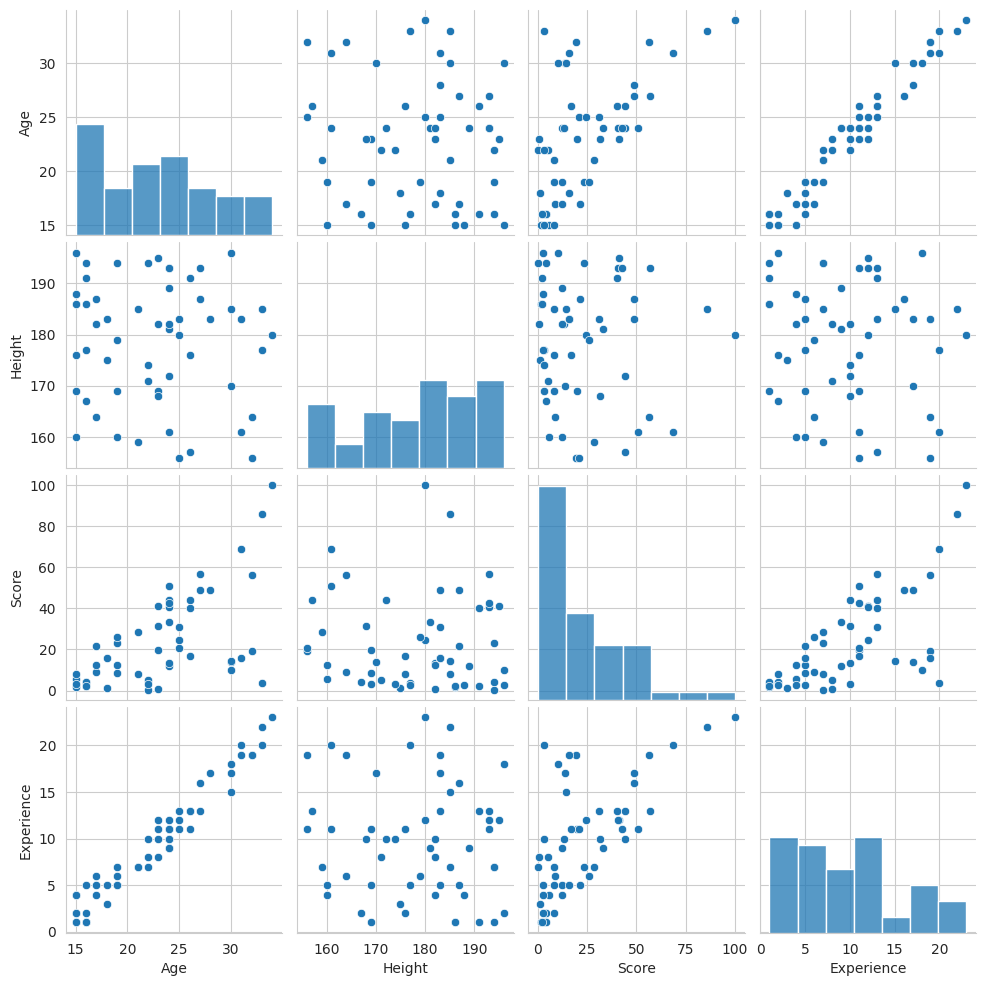

In [6]:
sns.pairplot(data)

Note:
- none of the variables show a normal 
- Age, Experience and Score show a linear relation

In [7]:
pearson_corr1, p_val = pearsonr(data['Age'], data['Score'])

pearson_corr1

np.float64(0.6253871169068042)

In [8]:
pearson_corr2, p_val = pearsonr(data['Experience'], data['Score'])

pearson_corr2

np.float64(0.6780647522662248)

In [9]:
pearson_corr3, p_val = pearsonr(data['Age'], data['Experience'])

pearson_corr3

np.float64(0.9755564188766258)

In [10]:
data_corr = data[['Age', 'Experience', 'Score']].corr()
data_corr

,Age,Experience,Score
Age,1.000000,0.975556,0.625387
Experience,0.975556,1.000000,0.678065
Score,0.625387,0.678065,1.000000


<Axes: >

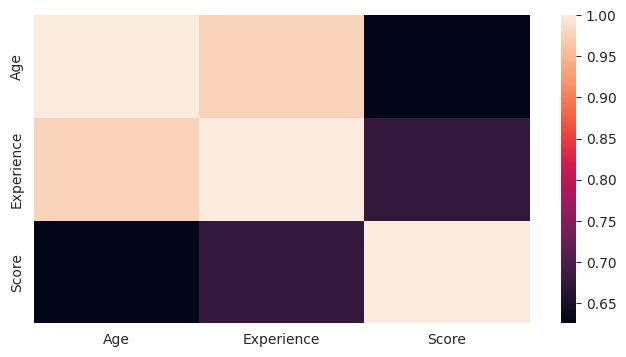

In [14]:
sns.heatmap(data_corr, xticklabels = data_corr.columns.values, yticklabels = data_corr.columns.values)

# Nonparametric correlation analysis

Nonparametric correlation analysis can be used to find correlation between *categorical*, *nonlinearly related*, *non-normally distributed* variables.

## Spearman's rank correlation

The Spearman's rank correlation method works on ordinal variables. An ordinal variable is a numeric variable that can be categorized.  
The Spearman's rank method converts ordinal variables into variable pairs and then calculates an R correlation coefficient by which to rank their variable pairs according to the extent of their correlation.

Similar to Pearson correlation, an R value that is close to 1 shows a strong positive relationship. Whereas an R value that's close to -1 shows a strong negative relationship. And an R value close to 0 shows that there is either a weak relationship or no relationship whatsoever.

In terms of assumptions, the Spearman's correlation assumes that the variables are:
- ordinal (numeric but can be ranked like categorical variable)
- related nonlinearly
- non-normally distrubuted